# Importing the Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import platform
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from keras import callbacks

In [2]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.10.13
Tensorflow version: 2.10.0
Keras version: 2.10.0


# Importing the Datasets

In [3]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

# Dataset Overview

## Dimensions of Training and Testing Dataset

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [6]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [7]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

## Visualizing the Data using TSNE

In [8]:
X_tsn = X/255

tsne = TSNE()
tsne_res = tsne.fit_transform(X_tsn)

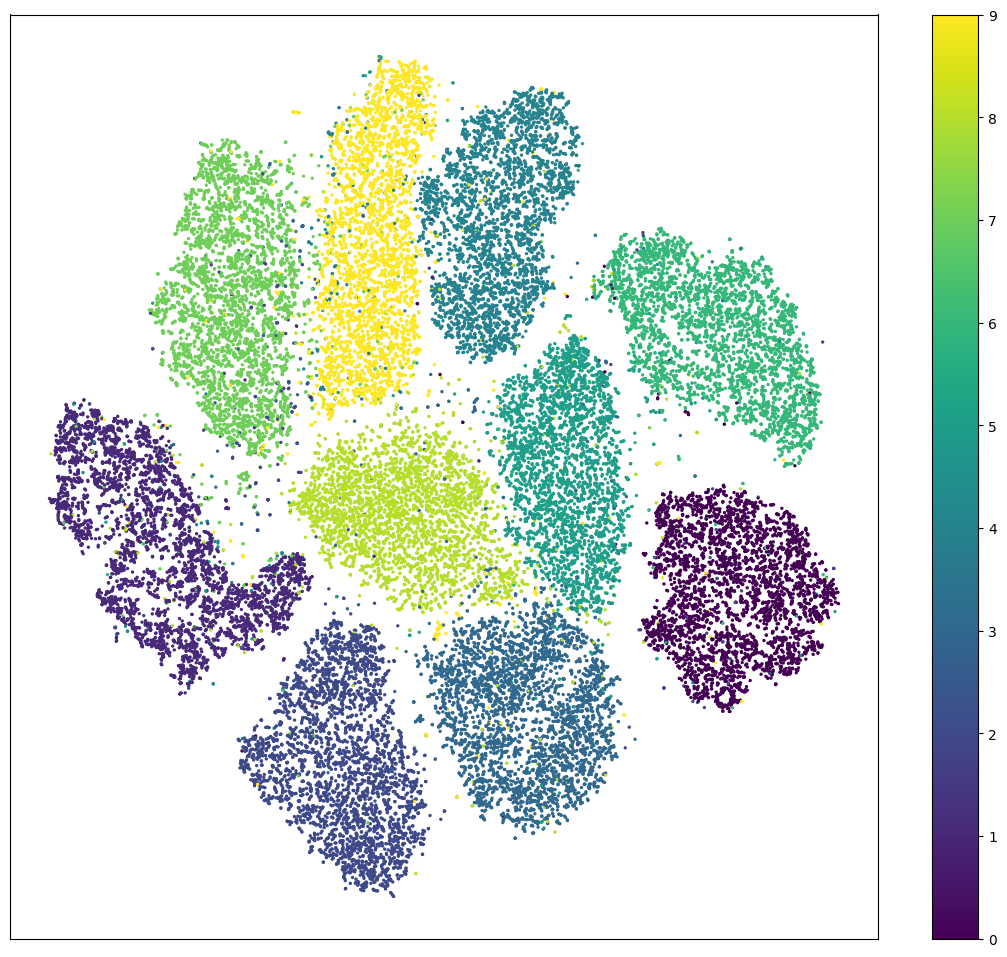

In [9]:
plt.figure(figsize=(14, 12))
plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

## Spliting the Data into Training Set and Validation Set

In [10]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)

## Dimensions of Training Set and Validation Set

In [11]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


## Converting the Training, Testing and Validation data into Array

In [12]:
x_train_reshaped = X_train.to_numpy().reshape(33600, 28, 28)
y_train_reshaped = y_train.values
x_validation_reshaped = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_reshaped = y_validation.values
x_test_reshaped = test.to_numpy().reshape(28000, 28, 28)

## Dimensions of Training, Testing and Validation Set after Reshaping

In [13]:
print('x_train:', x_train_reshaped.shape)
print('y_train:', y_train_reshaped.shape)
print('x_validation:', x_validation_reshaped.shape)
print('y_validation:', y_validation_reshaped.shape)
print('x_test:', x_test_reshaped.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [14]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_reshaped.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


# Exploring the Dataset

In [15]:
pd.DataFrame(x_train_reshaped[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


## Visualing how Digit were Written

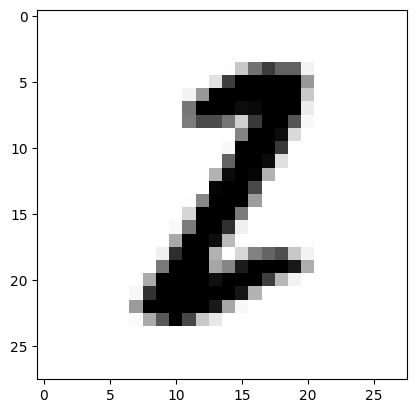

In [16]:
plt.imshow(x_train_reshaped[0], cmap=plt.cm.binary)
plt.show()

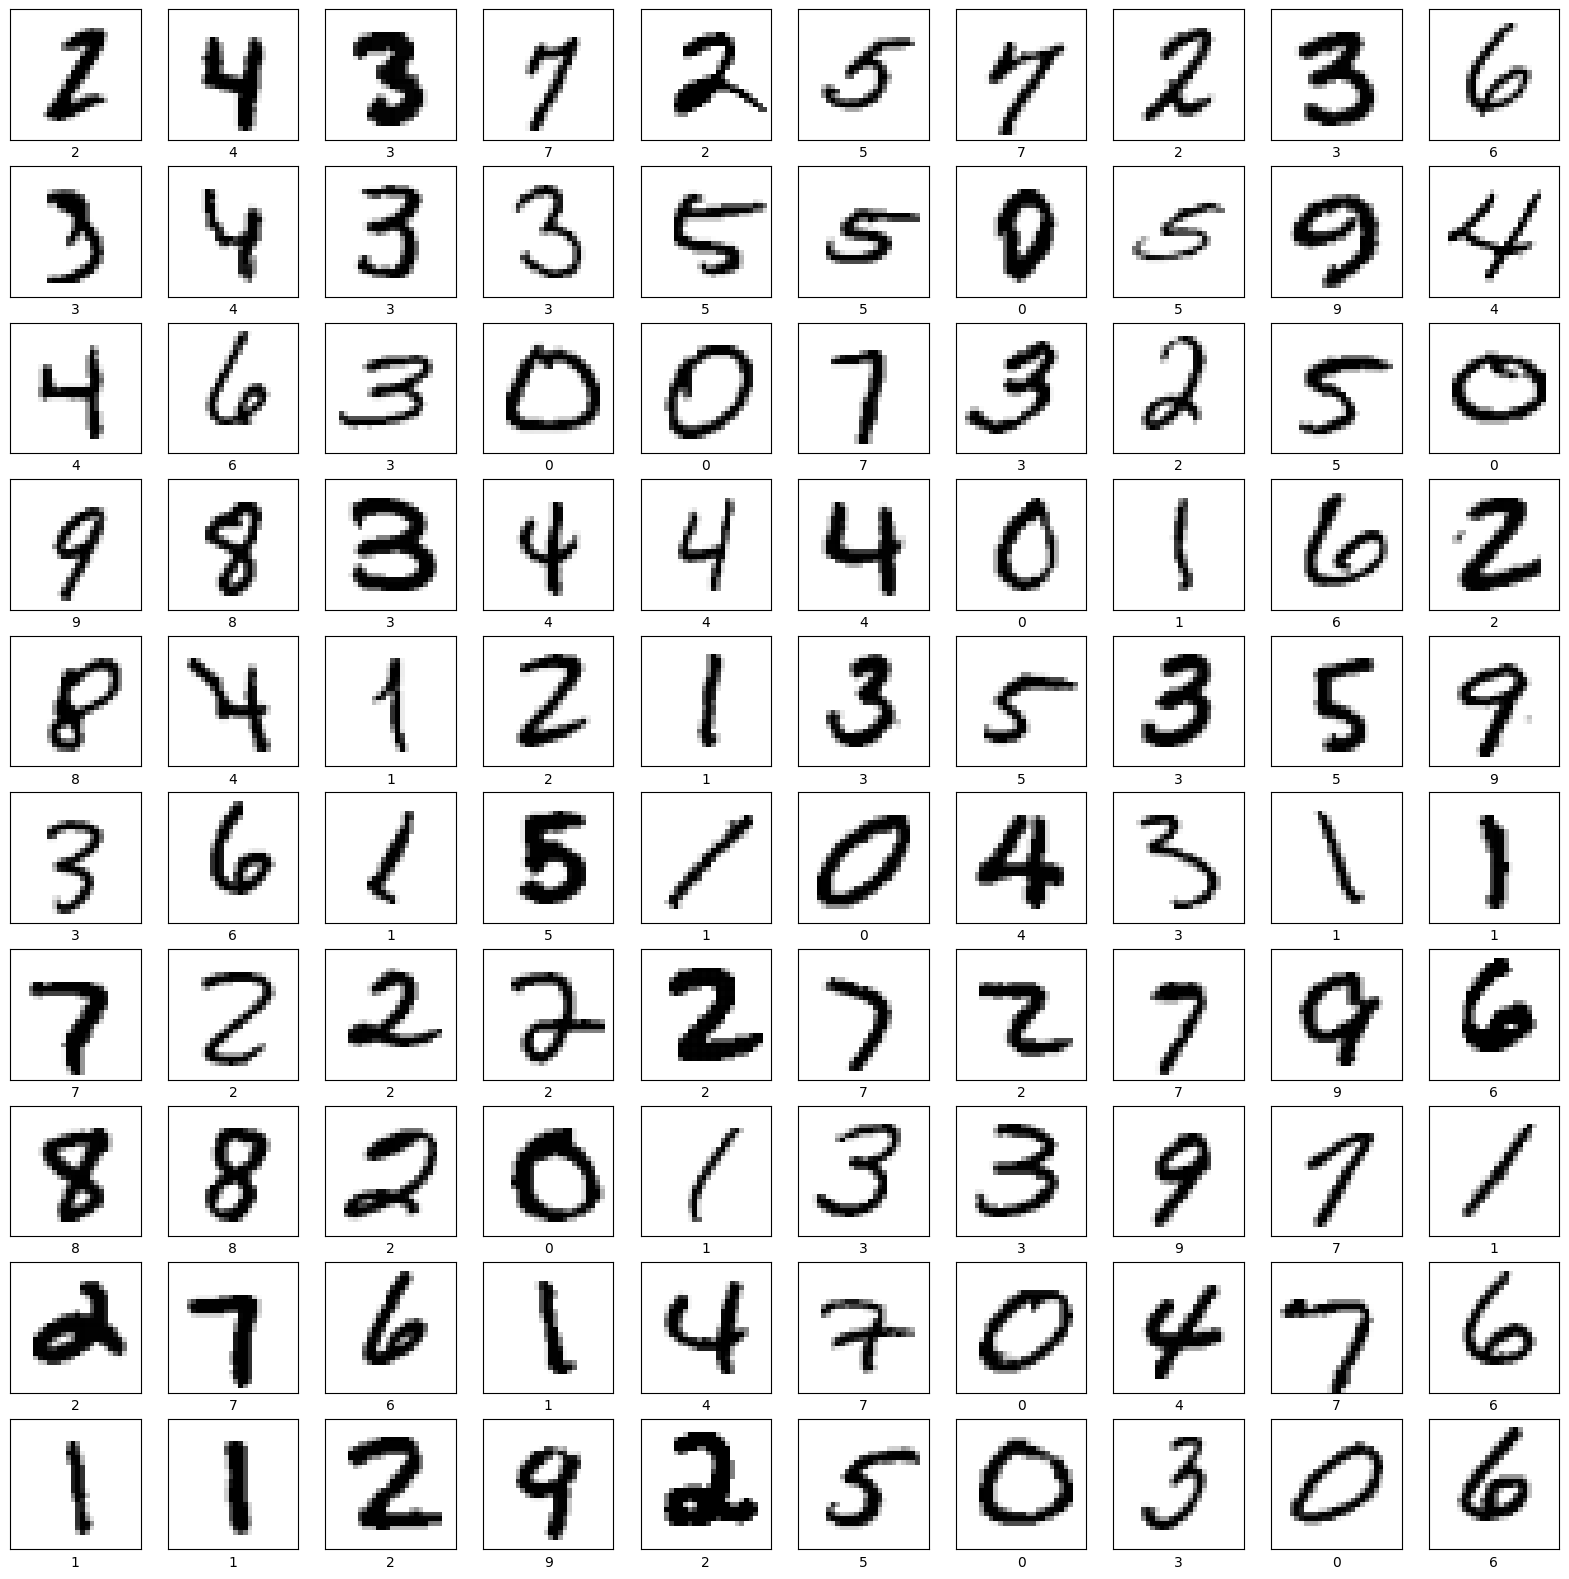

In [17]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_reshaped[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_reshaped[i])
plt.show()

## Reshaping Training, Testing and Validation Set

In [18]:
x_train_with_channels = x_train_reshaped.reshape(
    x_train_reshaped.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_channels = x_validation_reshaped.reshape(
    x_validation_reshaped.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_channels = x_test_reshaped.reshape(
    x_test_reshaped.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [19]:
print('x_train_with_channels:', x_train_with_channels.shape)
print('x_validation_with_channels:', x_validation_with_channels.shape)
print('x_test_with_channels:', x_test_with_channels.shape)
x_train_with_channels: (33600, 28, 28, 1)
x_validation_with_channels: (8400, 28, 28, 1)
x_test_with_channels: (28000, 28, 28, 1)

x_train_with_channels: (33600, 28, 28, 1)
x_validation_with_channels: (8400, 28, 28, 1)
x_test_with_channels: (28000, 28, 28, 1)


## Normalizing Training, Testing and Validation Dataset

In [20]:
x_train_normalized = x_train_with_channels / 255
x_validation_normalized = x_validation_with_channels / 255
x_test_normalized = x_test_with_channels / 255

In [21]:
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# Building Convolutional Neural Network Model

## Step 1 - Initializing the CNN

In [22]:
model = tf.keras.models.Sequential()

## Step 2 - Adding First Convolutional Layer

In [23]:
model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

## Step 3 - Adding First Pooling Layer

In [24]:
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

## Step 4 - Adding Second Convolutional Layer

In [25]:
model.add(tf.keras.layers.Convolution2D(
    kernel_size=5,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

## Step 5 - Adding Second Pooling Layer

In [26]:
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

## Step 6 - Adding the Flattening Layer

In [27]:
model.add(tf.keras.layers.Flatten())

## Step 7 - Adding the Fully Connected Layer

In [28]:
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

## Step 8 - Adding the Dropout Layer

In [29]:
model.add(tf.keras.layers.Dropout(0.2))

## Step 9 - Adding the Output Layer

In [30]:
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

## Summary of the CNN Model

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

## Visualization of the Model

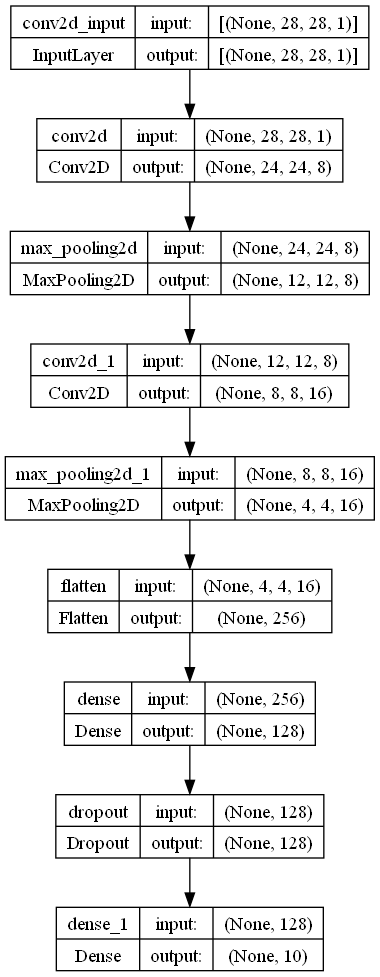

In [32]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compiling the CNN Model

In [33]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Training the Model on Dataset

In [34]:
earlystopping = callbacks.EarlyStopping(monitor="val_loss",
                                        mode="min",
                                        patience=5,
                                        restore_best_weights=True)

In [35]:
training_history = model.fit(
    x_train_normalized,
    y_train_reshaped,
    epochs=100,
    validation_data=(x_validation_normalized, y_validation_reshaped),
    callbacks=[earlystopping]
)

print("The model has successfully trained")

Epoch 1/100
1050/1050 [==============================] - 212s 202ms/step - loss: 0.2656 - accuracy: 0.9182 - val_loss: 0.1005 - val_accuracy: 0.9689
Epoch 2/100
1050/1050 [==============================] - 211s 201ms/step - loss: 0.0910 - accuracy: 0.9707 - val_loss: 0.0694 - val_accuracy: 0.9781
Epoch 3/100
1050/1050 [==============================] - 211s 201ms/step - loss: 0.0638 - accuracy: 0.9796 - val_loss: 0.0550 - val_accuracy: 0.9835
Epoch 4/100
1050/1050 [==============================] - 205s 196ms/step - loss: 0.0491 - accuracy: 0.9840 - val_loss: 0.0503 - val_accuracy: 0.9856
Epoch 5/100
1050/1050 [==============================] - 204s 194ms/step - loss: 0.0422 - accuracy: 0.9861 - val_loss: 0.0530 - val_accuracy: 0.9840
Epoch 6/100
1050/1050 [==============================] - 204s 194ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0535 - val_accuracy: 0.9869
Epoch 7/100
1050/1050 [==============================] - 203s 194ms/step - loss: 0.0302 - accuracy: 0.9906

# Model Evaluation

## Loss Curve for Training and Validation Datasets

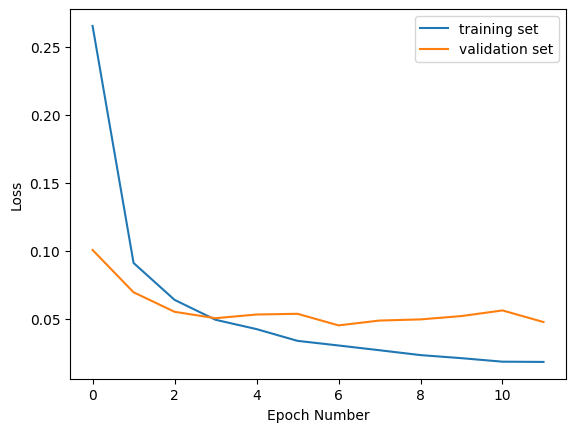

In [36]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

## Accuracy Curve for Training and Validation Datasets

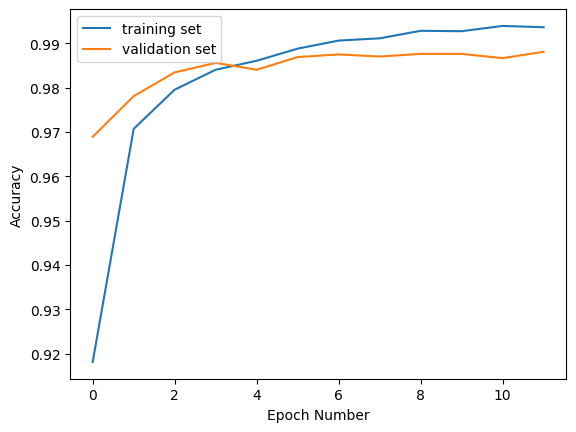

In [37]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

## Performace on Training Dataset

In [38]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_reshaped)

In [39]:
print('Train loss: ', train_loss)
print('Train accuracy: ', train_accuracy)

Train loss:  0.01576061174273491
Train accuracy:  0.9952976107597351


## Performance on Validation Dataset

In [40]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_reshaped)

In [41]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.04497675225138664
Validation accuracy:  0.987500011920929


## Save and Load the Model

In [42]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [43]:
loaded_model = tf.keras.models.load_model(model_name)

## Visualising how Digits were Written (Validation Dataset)

In [44]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 1s 2ms/step


In [45]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [46]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,4.114094e-08,9.999921e-01,7.949883e-07,8.684625e-11,2.516786e-06,5.340728e-10,1.271947e-07,4.026529e-06,3.153686e-07,1.553747e-08
1,2.562165e-09,5.719627e-07,6.702577e-07,9.999411e-01,5.881806e-08,2.162799e-06,2.297623e-11,8.266200e-08,3.049717e-05,2.475483e-05
2,5.476383e-08,6.334128e-09,1.326576e-04,1.057145e-05,3.905301e-08,5.951695e-06,1.037532e-07,8.364990e-09,9.998493e-01,1.264082e-06
3,6.123528e-08,9.999477e-01,9.155615e-07,1.279570e-08,1.925172e-05,1.251393e-08,2.153505e-07,2.820396e-05,1.954301e-06,1.527951e-06
4,5.797967e-13,2.817745e-12,1.282320e-09,9.546715e-09,1.178344e-04,9.268426e-10,2.429714e-13,1.694449e-06,5.202569e-04,9.993602e-01
...,...,...,...,...,...,...,...,...,...,...
8395,2.264711e-16,1.123541e-12,1.774995e-10,5.202679e-15,9.999999e-01,7.309416e-13,2.205483e-12,6.704447e-11,4.820717e-13,7.840913e-10
8396,2.037239e-10,1.832994e-11,9.670419e-10,1.912680e-06,7.924628e-09,9.994730e-01,7.792809e-05,3.444872e-14,4.471559e-04,1.981695e-09
8397,5.111961e-10,1.678691e-09,1.189485e-09,3.175760e-10,3.523054e-07,3.268671e-08,3.308235e-12,9.999849e-01,2.492924e-07,1.442918e-05
8398,8.617710e-08,3.835329e-11,4.557451e-11,6.806376e-11,2.621222e-10,1.879319e-07,9.999996e-01,7.775185e-15,2.343911e-09,4.026677e-12


In [47]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


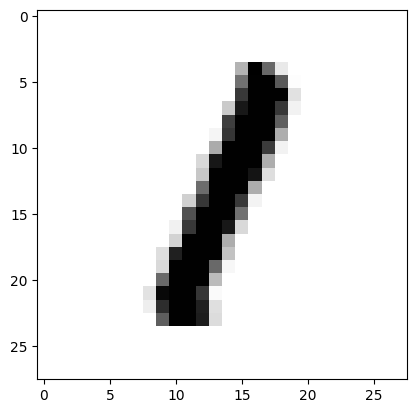

In [48]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

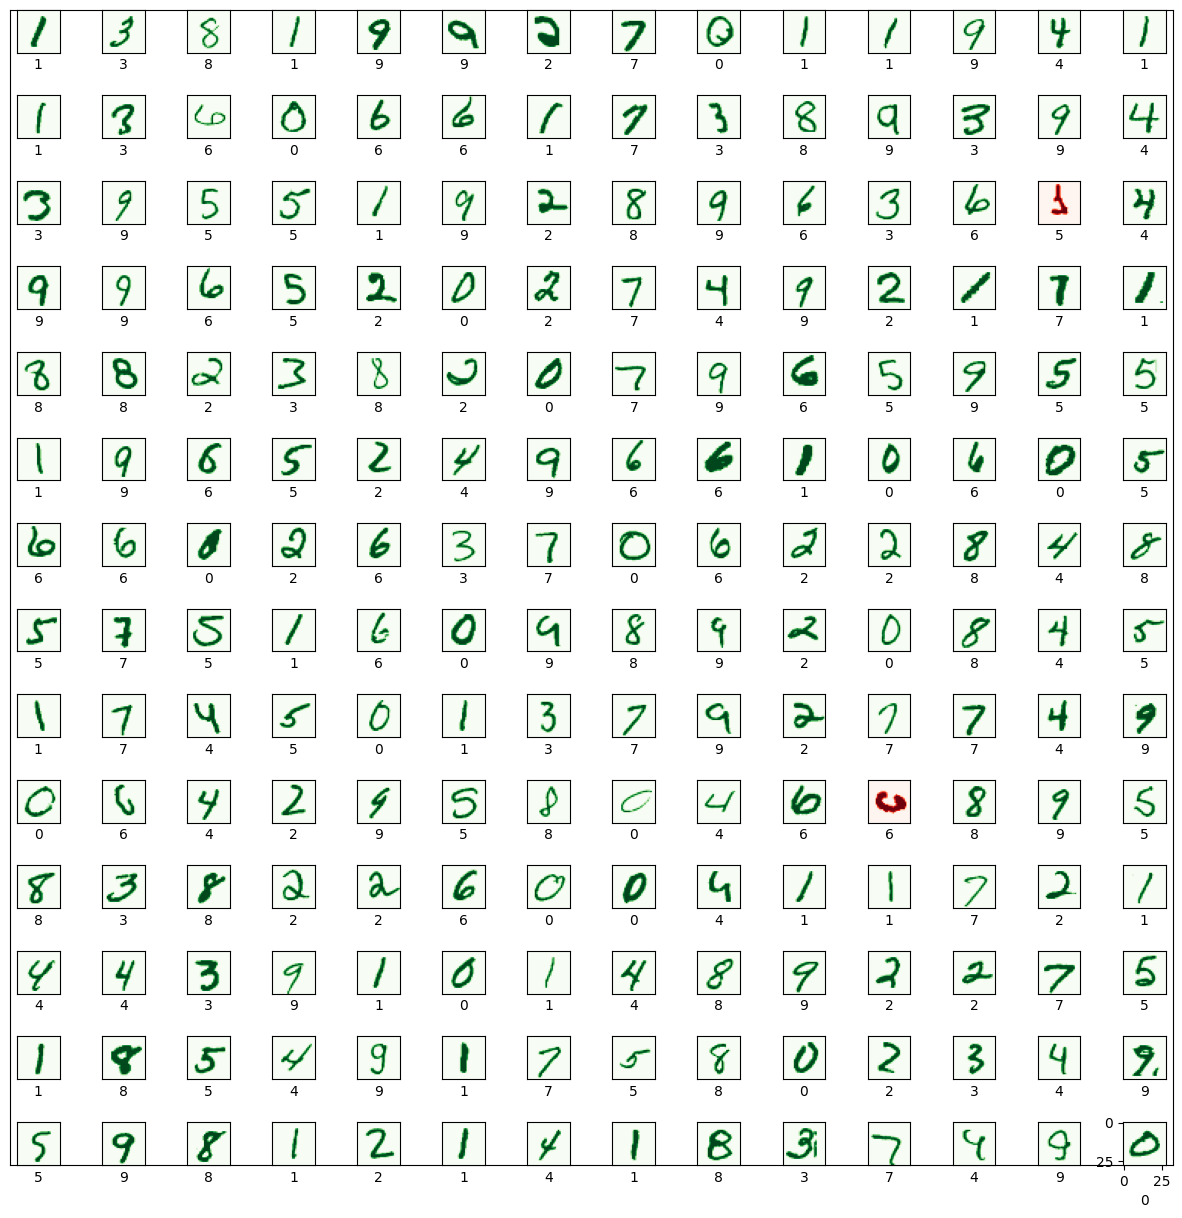

In [49]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_reshaped[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

## Confusion Matrix of Validation Dataset

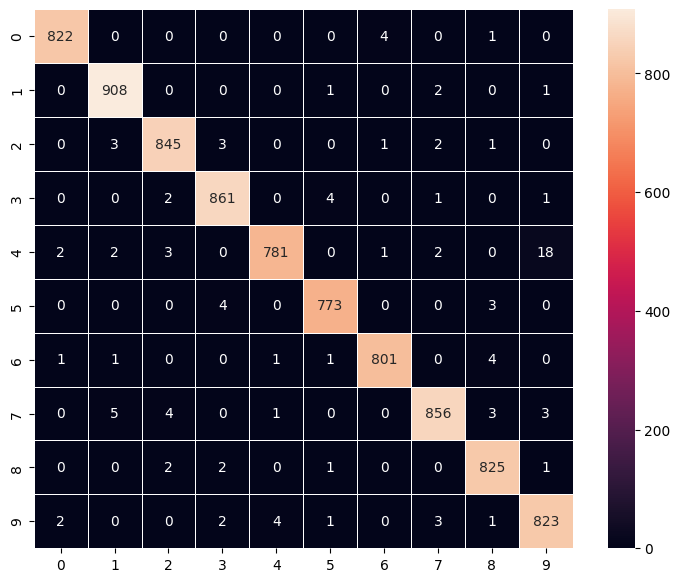

In [50]:
confusion_matrix = tf.math.confusion_matrix(y_validation_reshaped, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Model prediction on Unseen Dataset (Test Data)

In [51]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)
predictions_one_hot: (28000, 10)

875/875 [==============================] - 2s 2ms/step
predictions_one_hot: (28000, 10)


## Predicted Probabilities of all Digits

In [52]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.819041e-09,3.196248e-11,9.999998e-01,2.313854e-08,1.098392e-11,1.032326e-14,1.800044e-13,3.356672e-09,6.060889e-08,1.433669e-11
1,9.999205e-01,7.240418e-09,2.424448e-07,7.440052e-09,4.015644e-09,1.847891e-07,1.730226e-05,4.017571e-07,2.508495e-06,5.877209e-05
2,1.245285e-09,3.496101e-09,8.422645e-07,5.863030e-06,9.355510e-05,1.128912e-06,1.885300e-09,2.312110e-06,2.763207e-04,9.996199e-01
3,3.415144e-01,1.224495e-05,1.593591e-03,3.900778e-03,8.501357e-06,2.152957e-06,3.355138e-05,3.211389e-04,7.636726e-03,6.449769e-01
4,7.034497e-09,1.059270e-07,1.720308e-06,9.999641e-01,3.667198e-10,5.452580e-08,5.222533e-12,1.388379e-07,3.271826e-05,1.261721e-06
...,...,...,...,...,...,...,...,...,...,...
27995,2.034249e-14,7.170213e-16,2.904837e-11,7.198351e-11,2.301792e-08,4.870956e-10,4.210782e-15,1.576644e-07,1.243934e-07,9.999996e-01
27996,1.194802e-07,1.016480e-07,4.200459e-06,1.897212e-06,1.961832e-08,2.098857e-06,2.769589e-11,9.993299e-01,5.554717e-09,6.617932e-04
27997,7.424479e-17,8.083532e-14,1.059294e-14,9.999999e-01,5.873425e-17,2.275034e-11,1.995366e-20,3.409398e-11,3.636607e-09,3.460552e-08
27998,8.782957e-10,7.525383e-10,7.547322e-09,2.121387e-08,1.807896e-04,1.069165e-09,1.377400e-10,2.033290e-05,1.534354e-07,9.997988e-01


## Visualising how the Digits were Written of Test Dataset (for first digit)

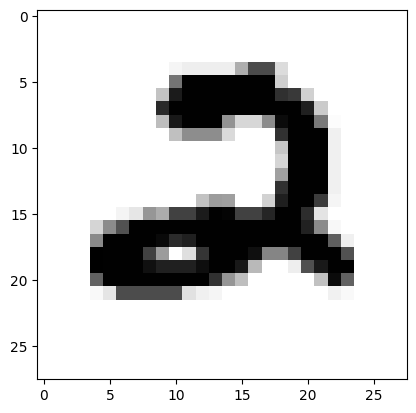

In [53]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

# Submission

In [54]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 2s 2ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [55]:
test_pred.to_csv('submission.csv', index = False)